# San Francisco Crime Data Exploration
### Keenan Zucker and Joe Sutker


We are going to explore our dataset by doing some visualization and such. We will start by importing packages we will be using for visualization and reading the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

/home/jsutker/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/jsutker/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Next, we will import the training data set to explore using the csv reader from pandas and using the head function to print out the first five rows, to see what some of the data looks like!

In [2]:
crime_train = pd.read_csv("./train.csv" )

print crime_train.head()

                 Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.4387

Immediately, we can see that this dataset is going to be complicated because only the latitude and longitude (and time of occurance) are numerical values. We will have to be clever in how to compare different catagories that are not simply numbers. 

In [3]:
print crime_train["DayOfWeek"].unique() 

['Wednesday' 'Tuesday' 'Monday' 'Sunday' 'Saturday' 'Friday' 'Thursday']


This is reassuring, that there are only 7 days in the week!

In [4]:
print crime_train["Category"].unique()

['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']


This is going to be more complicated, since there are 39 different catagories of crime. Computing this will be a difficult task since we might have to turn these catagories into numerical values, which could be difficult. 

In [5]:
print crime_train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64


This is also pretty convinient! The dataset is actually complete and has no null values. This seems pretty rare for a dataset, but makes life easier on us since we will not have to add in values that could potentially change the accuracy of our predictions later.

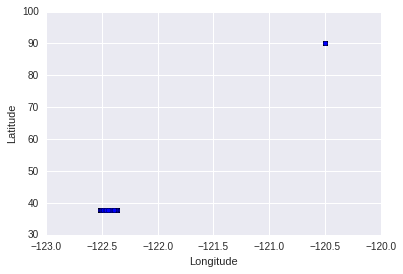

In [6]:
plt.scatter(crime_train.X, crime_train.Y)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

As seen, there is a clear outlier in the mix, somewhere on the other side of the world it looks like!

In [7]:
print type(crime_train)

<class 'pandas.core.frame.DataFrame'>


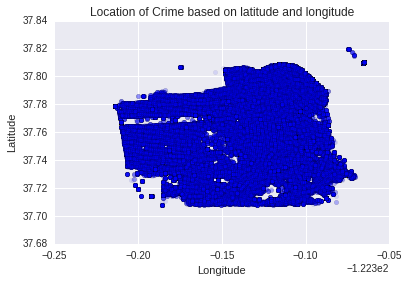

In [8]:
crime_train = crime_train[np.abs(crime_train.X-crime_train.X.mean())<=(3*crime_train.X.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
crime_train = crime_train[np.abs(crime_train.Y-crime_train.Y.mean())<=(3*crime_train.Y.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

plt.scatter(crime_train.X, crime_train.Y, alpha=0.1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Location of Crime based on latitude and longitude")
plt.show()

When we do some cleaning up of the longitude and latitude, that is, removing the outliers by dropping all the values that are more that 3 standard deviations away from the average, we are left with a graph that is more revealing. We sure do have a lot of data points!

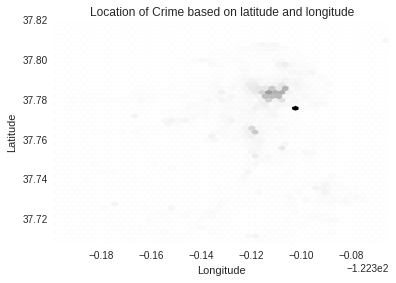

In [9]:
crime_train = crime_train[np.abs(crime_train.X-crime_train.X.mean())<=(3*crime_train.X.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
crime_train = crime_train[np.abs(crime_train.Y-crime_train.Y.mean())<=(3*crime_train.Y.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

plt.hexbin(crime_train.X, crime_train.Y, gridsize=50)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Location of Crime based on latitude and longitude")
plt.show()

In [10]:
print crime_train["DayOfWeek"].value_counts()

Friday       131704
Wednesday    127307
Saturday     124940
Thursday     123202
Tuesday      123145
Monday       119715
Sunday       114926
Name: DayOfWeek, dtype: int64


As shown, there is a clear different of when crimes are most likely to happen, as friday is the most popular day, and sunday is the least popular day for crimes to occur!

In [11]:
print crime_train["Category"].value_counts()

LARCENY/THEFT                  172228
OTHER OFFENSES                 124728
NON-CRIMINAL                    90815
ASSAULT                         75745
DRUG/NARCOTIC                   53709
VEHICLE THEFT                   52374
VANDALISM                       43698
WARRANTS                        41853
BURGLARY                        36174
SUSPICIOUS OCC                  30756
MISSING PERSON                  25531
ROBBERY                         22769
FRAUD                           16370
FORGERY/COUNTERFEITING          10410
SECONDARY CODES                  9814
WEAPON LAWS                      8453
PROSTITUTION                     7472
TRESPASS                         7247
STOLEN PROPERTY                  4481
SEX OFFENSES FORCIBLE            4313
DISORDERLY CONDUCT               4283
DRUNKENNESS                      4222
RECOVERED VEHICLE                3080
KIDNAPPING                       2301
DRIVING UNDER THE INFLUENCE      2226
RUNAWAY                          1932
LIQUOR LAWS 

In [12]:
print crime_train["Resolution"].value_counts()

NONE                                      517166
ARREST, BOOKED                            204614
ARREST, CITED                              76444
LOCATED                                    16804
PSYCHOPATHIC CASE                          14269
UNFOUNDED                                   9425
JUVENILE BOOKED                             5511
COMPLAINANT REFUSES TO PROSECUTE            3905
DISTRICT ATTORNEY REFUSES TO PROSECUTE      3874
NOT PROSECUTED                              3659
JUVENILE CITED                              3305
PROSECUTED BY OUTSIDE AGENCY                2434
EXCEPTIONAL CLEARANCE                       1477
JUVENILE ADMONISHED                         1436
JUVENILE DIVERTED                            353
CLEARED-CONTACT JUVENILE FOR MORE INFO       212
PROSECUTED FOR LESSER OFFENSE                 51
Name: Resolution, dtype: int64


In [13]:
print crime_train["PdDistrict"].value_counts()

SOUTHERN      157174
MISSION       119907
NORTHERN      105282
BAYVIEW        89422
CENTRAL        85455
TENDERLOIN     81794
INGLESIDE      78841
TARAVAL        57163
PARK           49311
RICHMOND       40590
Name: PdDistrict, dtype: int64


In [14]:
print crime_train["Descript"].value_counts()

GRAND THEFT FROM LOCKED AUTO                                58771
LOST PROPERTY                                               31391
BATTERY                                                     27071
DRIVERS LICENSE, SUSPENDED OR REVOKED                       26675
STOLEN AUTOMOBILE                                           26165
WARRANT ARREST                                              23572
SUSPICIOUS OCCURRENCE                                       21398
AIDED CASE, MENTAL DISTURBED                                21085
PETTY THEFT FROM LOCKED AUTO                                19341
MALICIOUS MISCHIEF, VANDALISM OF VEHICLES                   17320
TRAFFIC VIOLATION                                           16376
PETTY THEFT OF PROPERTY                                     15992
MALICIOUS MISCHIEF, VANDALISM                               15595
THREATS AGAINST LIFE                                        14483
FOUND PROPERTY                                              11925
ENROUTE TO

In [15]:
print crime_train["Address"].value_counts()

800 Block of BRYANT ST          26533
800 Block of MARKET ST           6581
2000 Block of MISSION ST         5097
1000 Block of POTRERO AV         4063
900 Block of MARKET ST           3251
0 Block of TURK ST               3228
0 Block of 6TH ST                2884
300 Block of ELLIS ST            2703
400 Block of ELLIS ST            2590
16TH ST / MISSION ST             2504
1000 Block of MARKET ST          2489
1100 Block of MARKET ST          2319
2000 Block of MARKET ST          2168
100 Block of OFARRELL ST         2140
700 Block of MARKET ST           2081
3200 Block of 20TH AV            2035
100 Block of 6TH ST              1887
500 Block of JOHNFKENNEDY DR     1824
TURK ST / TAYLOR ST              1810
200 Block of TURK ST             1800
0 Block of PHELAN AV             1791
0 Block of UNITEDNATIONS PZ      1789
0 Block of POWELL ST             1717
100 Block of EDDY ST             1681
1400 Block of PHELPS ST          1629
300 Block of EDDY ST             1589
100 Block of

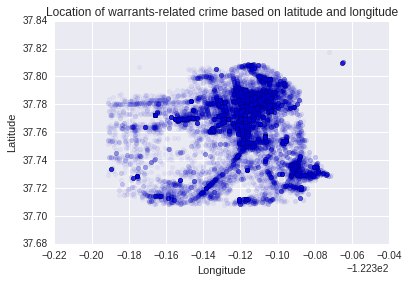

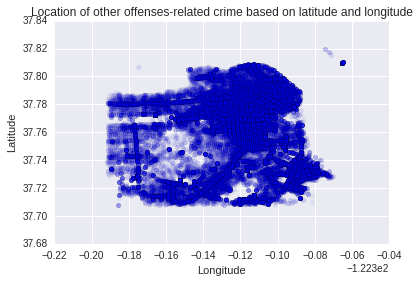

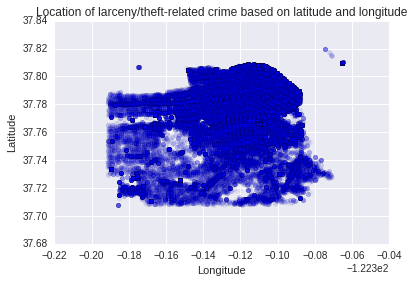

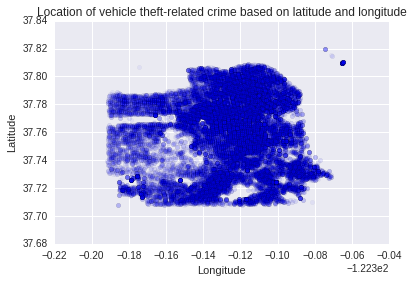

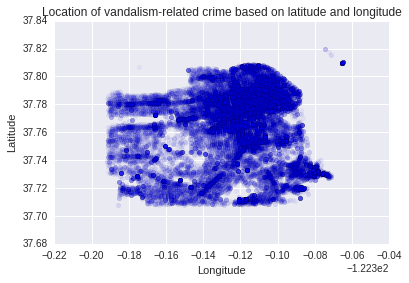

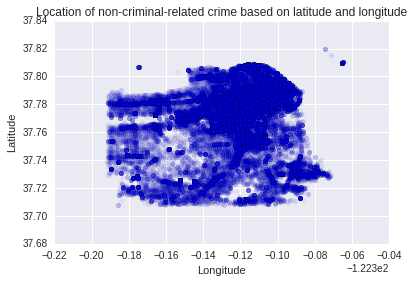

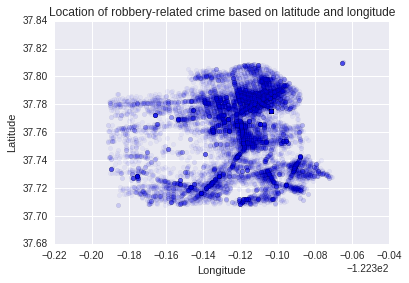

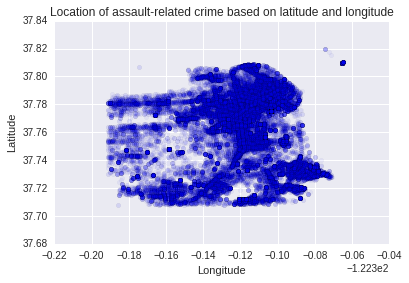

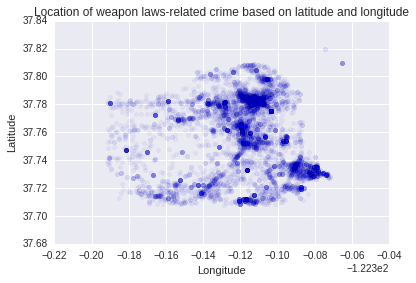

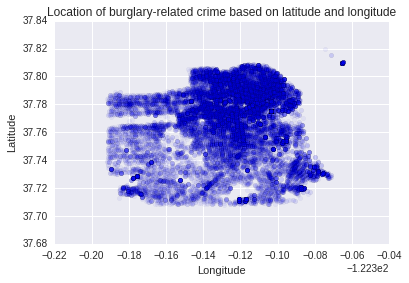

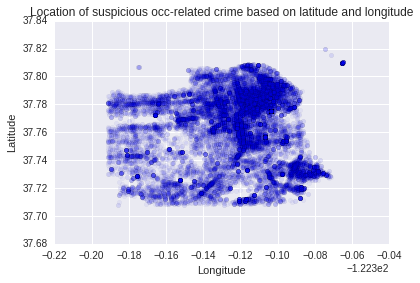

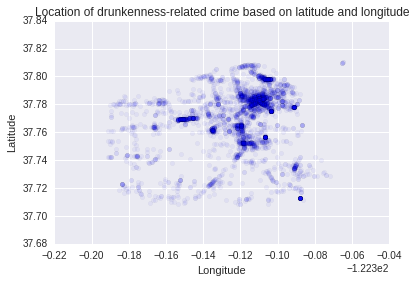

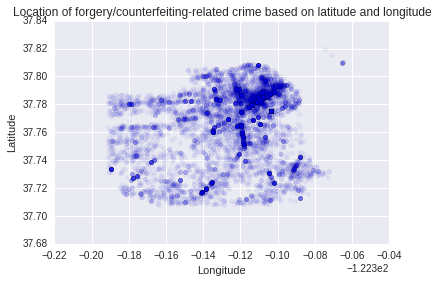

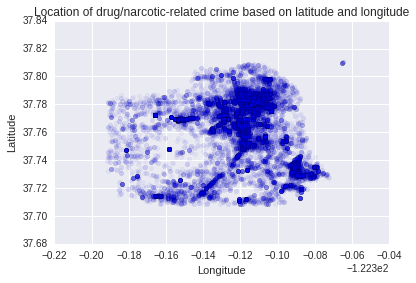

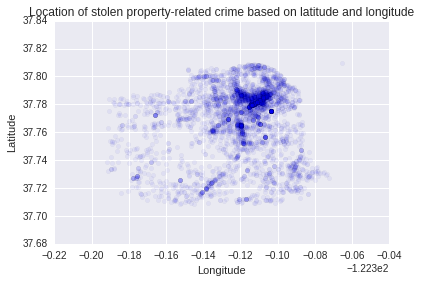

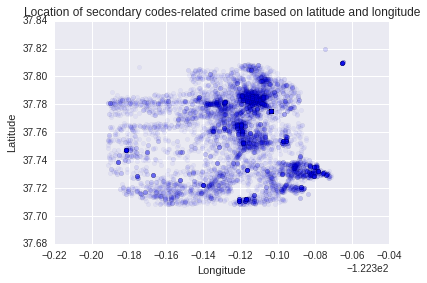

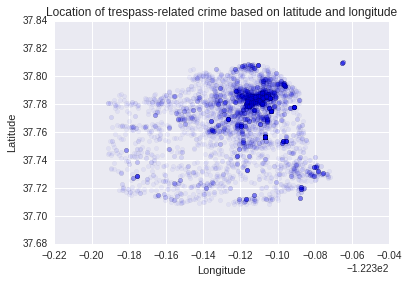

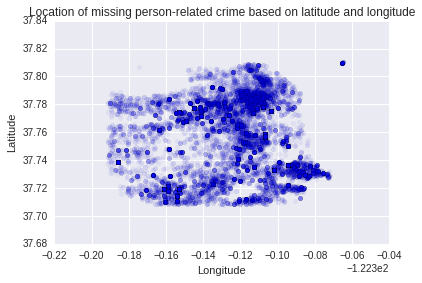

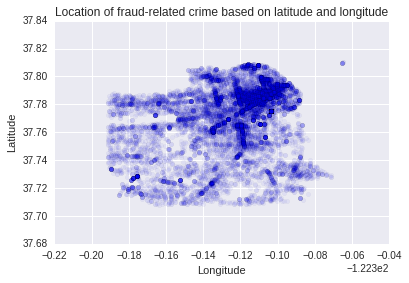

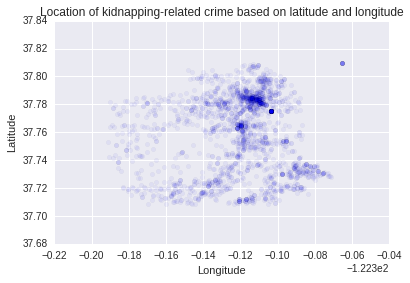

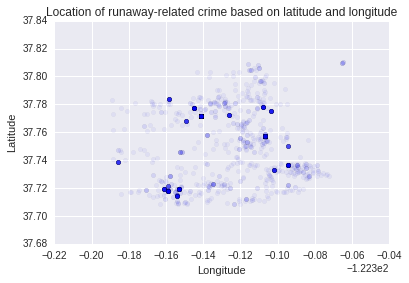

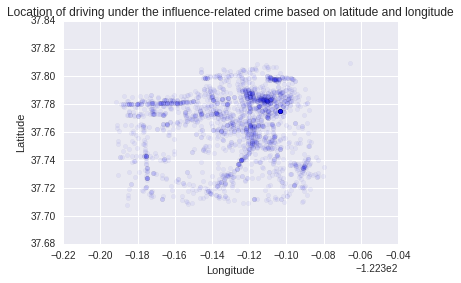

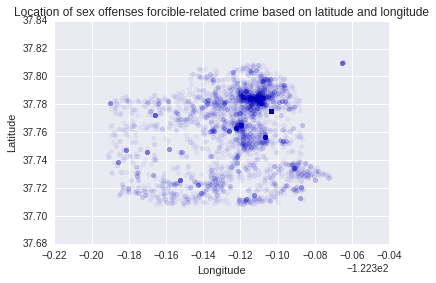

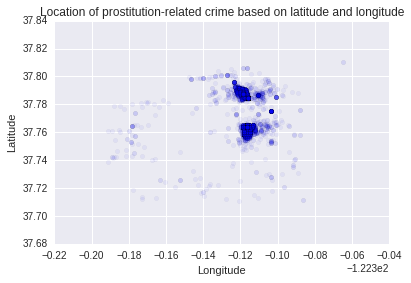

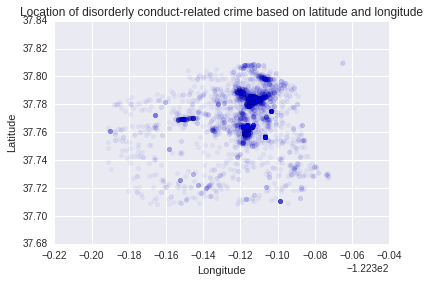

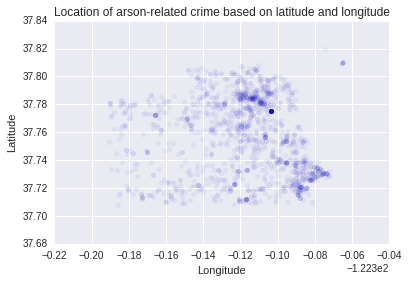

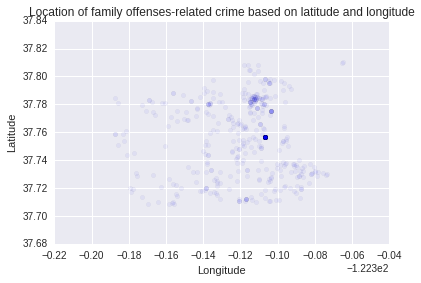

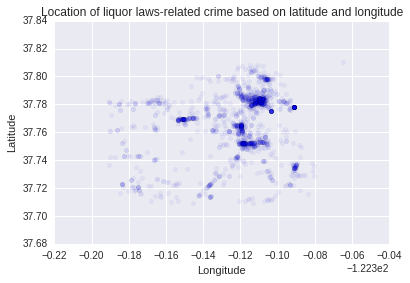

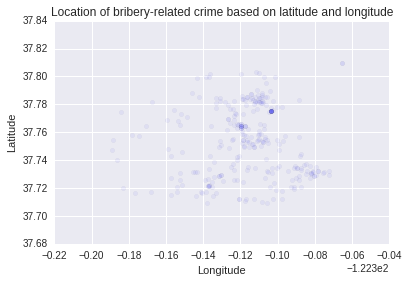

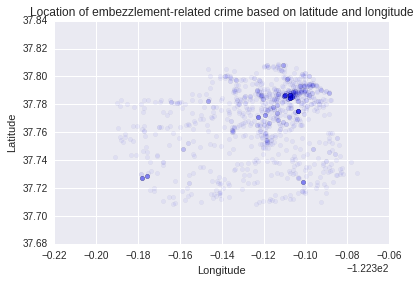

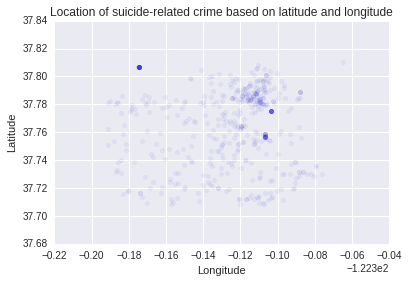

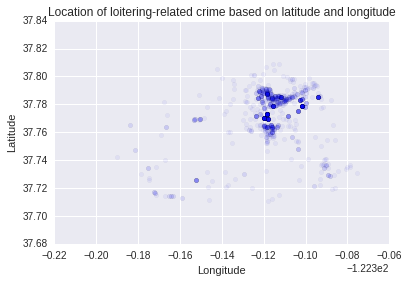

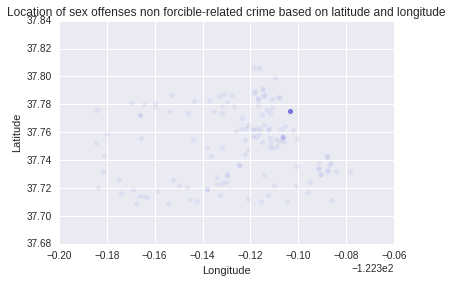

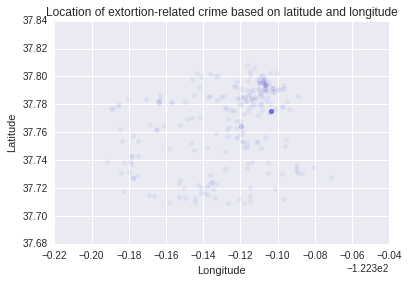

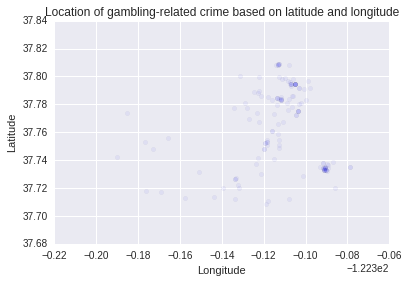

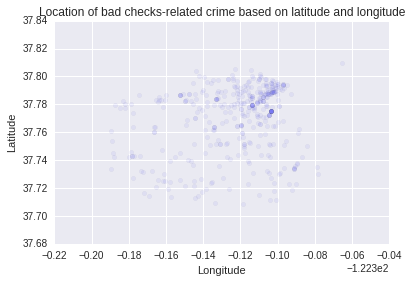

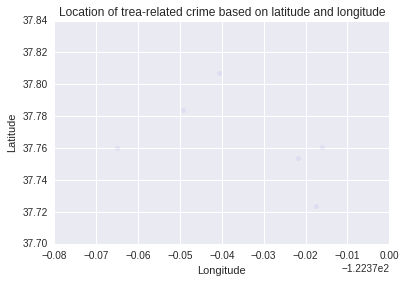

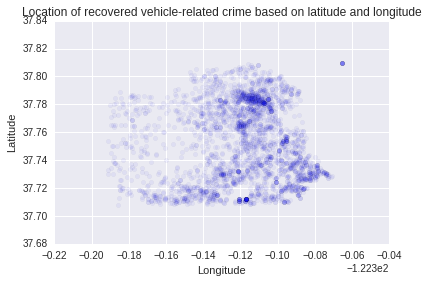

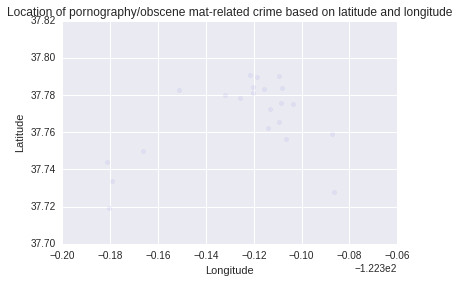

In [16]:
crime_train = crime_train[np.abs(crime_train.X-crime_train.X.mean())<=(3*crime_train.X.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
crime_train = crime_train[np.abs(crime_train.Y-crime_train.Y.mean())<=(3*crime_train.Y.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

for crime in crime_train["Category"].unique():
    plt.scatter(crime_train[crime_train["Category"] == crime].X, crime_train[crime_train["Category"] == crime].Y, alpha=0.05)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Location of " + crime.lower() + "-related crime based on latitude and longitude")
    plt.show()